<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# Convolutional Neural Networks with Keras

Estimated time needed **30** mins


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


## Objectives for this Notebook    
* How to use the Keras library to build convolutional neural networks
* Convolutional neural network with one set of convolutional and pooling layers
* Convolutional neural network with two sets of convolutional and pooling layers



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#Import-Keras-and-Packages">Import Keras and Packages</a>   
2. <a href="#Convolutional-Neural-Network-with-One-Set-of-Convolutional-and-Pooling-Layers">Convolutional Neural Network with One Set of Convolutional and Pooling Layers</a>  
3. <a href="#Convolutional-Neural-Network-with-Two-Sets-of-Convolutional-and-Pooling-Layers">Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers</a>  

</font>
</div>


### Install the necessary libraries


Let's start by installing the keras libraries and the packages that we would need to build a neural network.


In [5]:
# All Libraries required for this lab are listed below. The libraries need to be installed on Skills Network Labs. 
# If you run this notebook on a different environment, e.g. your desktop, you may want to install these.
# !pip install numpy==2.0.2
# !pip install pandas==2.2.2
# !pip install tensorflow_cpu==2.18.0
# !pip install matplotlib==3.9.2
# !pip install keras
# !pip install tensorflow[and-cuda]==2.18.0


In [2]:
!nvidia-smi


Sat Nov  1 11:11:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8              6W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.16.1
Num GPUs Available: 0
[]


#### Suppress the tensorflow warning messages
We use the following code to  suppress the warning messages due to use of CPU architechture for tensoflow.
You may want to **comment out** these lines if you are using the GPU architechture


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import Keras and Packages


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.


In [7]:
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

## Convolutional Neural Network with One Set of Convolutional and Pooling Layers


In [8]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# check shape
print(X_train.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1)


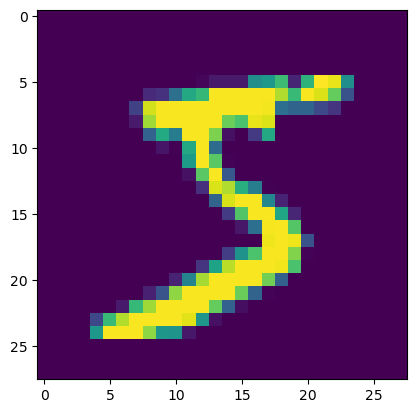

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

Let's normalize the pixel values to be between 0 and 1


In [10]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories
num_classes, y_train[0]

(10, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.


In [12]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu')) # 16 5x5 kernels => 16 feature maps (24x24x16)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # 16 feature maps => 8 feature maps
    
    model.add(Flatten()) # covnert to 1D array
    model.add(Dense(100, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax')) # output layer 10 number of classes
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.


In [13]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.9217 - loss: 0.2805 - val_accuracy: 0.9697 - val_loss: 0.1022
Epoch 2/10
300/300 - 4s - 13ms/step - accuracy: 0.9766 - loss: 0.0812 - val_accuracy: 0.9811 - val_loss: 0.0577
Epoch 3/10
300/300 - 4s - 12ms/step - accuracy: 0.9836 - loss: 0.0559 - val_accuracy: 0.9839 - val_loss: 0.0480
Epoch 4/10
300/300 - 4s - 12ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9869 - val_loss: 0.0417
Epoch 5/10
300/300 - 4s - 12ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9872 - val_loss: 0.0414
Epoch 6/10
300/300 - 4s - 15ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9884 - val_loss: 0.0370
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9869 - val_loss: 0.0387
Epoch 8/10
300/300 - 4s - 12ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9896 - val_loss: 0.0344
Epoch 9/10
300/300 - 3s - 11ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9892 - val_loss:

------------------------------------------


## Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [14]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [15]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 16ms/step - accuracy: 0.8535 - loss: 0.5168 - val_accuracy: 0.9531 - val_loss: 0.1548
Epoch 2/10
300/300 - 3s - 11ms/step - accuracy: 0.9632 - loss: 0.1245 - val_accuracy: 0.9749 - val_loss: 0.0816
Epoch 3/10
300/300 - 3s - 11ms/step - accuracy: 0.9729 - loss: 0.0879 - val_accuracy: 0.9765 - val_loss: 0.0748
Epoch 4/10
300/300 - 3s - 11ms/step - accuracy: 0.9785 - loss: 0.0724 - val_accuracy: 0.9818 - val_loss: 0.0585
Epoch 5/10
300/300 - 3s - 11ms/step - accuracy: 0.9810 - loss: 0.0621 - val_accuracy: 0.9838 - val_loss: 0.0525
Epoch 6/10
300/300 - 3s - 11ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9845 - val_loss: 0.0530
Epoch 7/10
300/300 - 3s - 11ms/step - accuracy: 0.9841 - loss: 0.0505 - val_accuracy: 0.9867 - val_loss: 0.0452
Epoch 8/10
300/300 - 4s - 12ms/step - accuracy: 0.9856 - loss: 0.0447 - val_accuracy: 0.9843 - val_loss: 0.0425
Epoch 9/10
300/300 - 3s - 12ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9870 - val_loss:

<h3>Practice Exercise 1</h3>


Let's see how batch size affects the time required and accuracy of the model training. 
For this, you can try to change batch_size to 1024 and check it's effect on accuracy


In [16]:
# Write your answer here
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))


Epoch 1/10
59/59 - 4s - 71ms/step - accuracy: 0.6443 - loss: 1.2489 - val_accuracy: 0.8933 - val_loss: 0.3712
Epoch 2/10
59/59 - 3s - 43ms/step - accuracy: 0.9215 - loss: 0.2741 - val_accuracy: 0.9456 - val_loss: 0.1914
Epoch 3/10
59/59 - 3s - 44ms/step - accuracy: 0.9495 - loss: 0.1717 - val_accuracy: 0.9623 - val_loss: 0.1307
Epoch 4/10
59/59 - 3s - 46ms/step - accuracy: 0.9612 - loss: 0.1321 - val_accuracy: 0.9685 - val_loss: 0.1111
Epoch 5/10
59/59 - 3s - 46ms/step - accuracy: 0.9669 - loss: 0.1102 - val_accuracy: 0.9727 - val_loss: 0.0926
Epoch 6/10
59/59 - 3s - 44ms/step - accuracy: 0.9704 - loss: 0.0984 - val_accuracy: 0.9752 - val_loss: 0.0810
Epoch 7/10
59/59 - 3s - 46ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9773 - val_loss: 0.0740
Epoch 8/10
59/59 - 3s - 49ms/step - accuracy: 0.9764 - loss: 0.0785 - val_accuracy: 0.9805 - val_loss: 0.0658
Epoch 9/10
59/59 - 3s - 48ms/step - accuracy: 0.9776 - loss: 0.0740 - val_accuracy: 0.9741 - val_loss: 0.0760
Epoch 10/1

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))
-->


<h3>Practice Exercise 2</h3>


Now, let's see how number of epochs  affect the time required and accuracy of the model training. 
For this, you can keep the batch_size=1024 and epochs=25 and check it's effect on accuracy


In [17]:
# Write your answer here
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))


Epoch 1/25
59/59 - 4s - 70ms/step - accuracy: 0.6631 - loss: 1.2873 - val_accuracy: 0.8767 - val_loss: 0.4183
Epoch 2/25
59/59 - 3s - 58ms/step - accuracy: 0.9028 - loss: 0.3271 - val_accuracy: 0.9333 - val_loss: 0.2320
Epoch 3/25
59/59 - 3s - 50ms/step - accuracy: 0.9389 - loss: 0.2068 - val_accuracy: 0.9542 - val_loss: 0.1575
Epoch 4/25
59/59 - 3s - 43ms/step - accuracy: 0.9553 - loss: 0.1515 - val_accuracy: 0.9664 - val_loss: 0.1176
Epoch 5/25
59/59 - 3s - 52ms/step - accuracy: 0.9636 - loss: 0.1208 - val_accuracy: 0.9710 - val_loss: 0.0976
Epoch 6/25
59/59 - 2s - 42ms/step - accuracy: 0.9682 - loss: 0.1030 - val_accuracy: 0.9752 - val_loss: 0.0867
Epoch 7/25
59/59 - 3s - 45ms/step - accuracy: 0.9721 - loss: 0.0906 - val_accuracy: 0.9768 - val_loss: 0.0748
Epoch 8/25
59/59 - 2s - 39ms/step - accuracy: 0.9750 - loss: 0.0817 - val_accuracy: 0.9796 - val_loss: 0.0664
Epoch 9/25
59/59 - 3s - 44ms/step - accuracy: 0.9772 - loss: 0.0746 - val_accuracy: 0.9823 - val_loss: 0.0602
Epoch 10/2

Double-click <b>here</b> for the solution.

<!-- Your answer is below:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))


    -->


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  | Aman  |  Updated the library versions to current |
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>

